<a href="https://colab.research.google.com/github/Jevaan21/intrusion-detection-dl/blob/main/intrusion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pandas scikit-learn tensorflow matplotlib seaborn



In [70]:
!pip install tensorflow


In [71]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [57]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
df = pd.read_csv('/content/drive/MyDrive/intrusion-detection-dl/UNSW_NB15_training-set.csv')


In [59]:
df.nunique()  # Shows how many unique values each column has



,0
id,175341
dur,74039
proto,133
service,13
state,9
spkts,480
dpkts,443
sbytes,7214
dbytes,6660
rate,76991


In [60]:
# === 3. CLEANING & PREPROCESSING ===
# Drop 'id' column if present
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)

# Drop missing values in 'attack_cat' if you're using it
df = df[df['attack_cat'].notnull()]

Preproessing

Encode Categorical Columns

In [61]:
# Encode categorical columns
categorical_cols = ['proto', 'service', 'state', 'attack_cat']
le = LabelEncoder()
df_encoded = df.copy()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


Split Features and Target

In [62]:
# === 4. SELECT FEATURES & TARGET ===
# Binary classification using 'label' column (0=normal, 1=attack)
X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

 Feature Scaling

In [63]:
# === 5. SCALE FEATURES ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# === 6. SPLIT DATA ===
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Build and Train the DNN Model

In [65]:
# === 7. BUILD DNN MODEL ===
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluate the Model

In [66]:
# === 8. TRAIN MODEL ===
print("🔁 Training the model...")
history = model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)


🔁 Training the model...
Epoch 1/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9209 - loss: 0.1979 - val_accuracy: 0.9989 - val_loss: 0.0065
Epoch 2/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9964 - loss: 0.0138 - val_accuracy: 1.0000 - val_loss: 5.1845e-04
Epoch 3/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9989 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 4.6573e-04
Epoch 4/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9998 - val_loss: 0.0011
Epoch 5/5
877/877 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9992 - loss: 0.0028 - val_accuracy: 1.0000 - val_loss: 1.2031e-04


Visualize Training Performance

In [67]:
# === 9. EVALUATE MODEL ===
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32").flatten()

print("\n✅ Model evaluation complete:")
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
plt.show()


1096/1096 ━━━━━━━━━━━━━━━━━━━━ 1s 964us/step

✅ Model evaluation complete:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11169
           1       1.00      1.00      1.00     23900

    accuracy                           1.00     35069
   macro avg       1.00      1.00      1.00     35069
weighted avg       1.00      1.00      1.00     35069

ROC AUC Score: 1.0


 Confusion Matrix

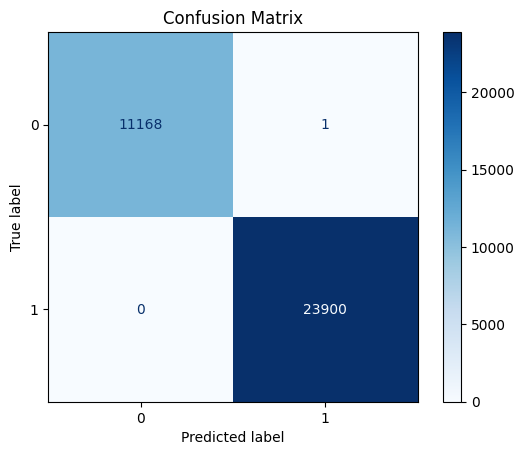

In [68]:
# === 10. CONFUSION MATRIX ===
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

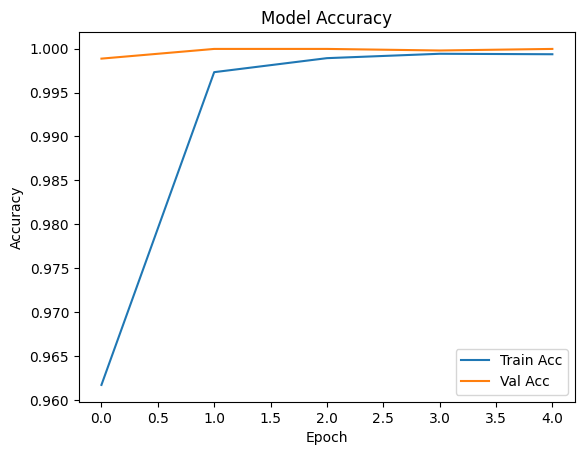

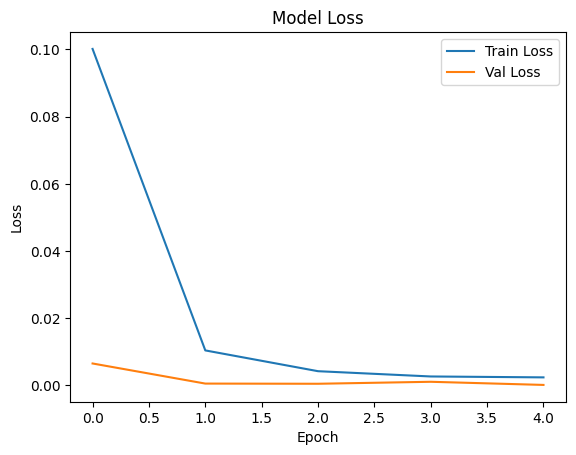

In [69]:
# === 11. TRAINING PERFORMANCE PLOT ===
# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()